In [1]:
# Import libraries
import pandas as pd
import numpy as np
import math
import sys
import matplotlib as mpl
import seaborn as sns
import sklearn
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

In [2]:
# Read raw dataset directly from CSSEGISandData repository 

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df = pd.read_csv(url)

In [3]:
# Print the Dataframe
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,183445,183572,183687,183908,184038,184224,184360,184473,184587,184819
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,293917,293917,293917,293917,293917,293917,293917,293917,293917,293917
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,266424,266445,266487,266542,266591,266654,266700,266772,266839,266916
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,44671,44671,45061,45061,45061,45326,45326,45326,45326,45326
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,101901,101901,102209,102209,102209,102209,102301,102301,102301,102301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,662588,662588,669542,672039,672039,672039,672039,672039,672039,672039
281,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
282,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11848,11848,11848,11849,11849,11849,11849,11849,11849,11849
283,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,327994,327994,327994,328550,328550,328550,328550,328550,328550,329483


In [4]:
# Function to drop columns that don't respond to real countries.
# Also drops the columns "Province/State", "Lat", "Long".

def groupby_country_name(df):

  drop_names = ['Antarctica', 'Diamond Princess', 'MS Zaandam',
              'Summer Olympics 2020', 'West Bank and Gaza',
              'Winter Olympics 2022']

  mask =[]

  for i in range(len(df)):
    if df.iloc[i]['Country/Region'] in drop_names:
      mask.append(i)

  new_df = df.drop(mask, axis=0)

  new_df = new_df.drop(columns=['Province/State', 'Lat', 'Long'])

  df_reduced = new_df.groupby(['Country/Region']).sum()

  df_reduced.reset_index(inplace=True)
  df_reduced = df_reduced.rename(columns = {'index':'Country/Region'})

  return df_reduced

In [5]:
# Filter the original Dataframe
df_reduced = groupby_country_name(df)

In [6]:
# Show the fltered Dataframe
df_reduced

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,183445,183572,183687,183908,184038,184224,184360,184473,184587,184819
1,Albania,0,0,0,0,0,0,0,0,0,...,293917,293917,293917,293917,293917,293917,293917,293917,293917,293917
2,Algeria,0,0,0,0,0,0,0,0,0,...,266424,266445,266487,266542,266591,266654,266700,266772,266839,266916
3,Andorra,0,0,0,0,0,0,0,0,0,...,44671,44671,45061,45061,45061,45326,45326,45326,45326,45326
4,Angola,0,0,0,0,0,0,0,0,0,...,101901,101901,102209,102209,102209,102209,102301,102301,102301,102301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,0,0,0,0,0,0,0,0,0,...,529730,530402,530649,530649,531094,531657,531963,531963,532902,533195
189,Vietnam,0,2,2,2,2,2,2,2,2,...,10759850,10760595,10761435,10762532,10763694,10764986,10766128,10767200,10767948,10768844
190,Yemen,0,0,0,0,0,0,0,0,0,...,11848,11848,11848,11849,11849,11849,11849,11849,11849,11849
191,Zambia,0,0,0,0,0,0,0,0,0,...,327994,327994,327994,328550,328550,328550,328550,328550,328550,329483


In [10]:
# Select the time period of your interest --> n_days
# For the whole datset, DTW is going to take for ever.

n_days = 102

df_reduced.drop(df_reduced.iloc[:, n_days:],axis = 1, inplace=True)
df_reduced

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1092,1176,1226,1330,1463,1531,1703,1827,1827,2171
1,Albania,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,782
2,Algeria,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154
3,Andorra,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,745
4,Angola,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,0,0,0,0,0,0,0,0,0,...,288,311,318,323,325,329,329,331,333,335
189,Vietnam,0,2,2,2,2,2,2,2,2,...,268,268,270,270,270,270,270,270,270,270
190,Yemen,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,7
191,Zambia,0,0,0,0,0,0,0,0,0,...,74,76,84,84,88,88,95,97,106,109


In [11]:
# Shift the time series so day 0 correspond to the first infection for each country

data = df_reduced.values
time_series = []
for country in data:
  days = [country[i] for i in range(1, len(country)) if country[i] !=0]
  time_series.append(days)


In [12]:
# DTW function: Calculate the distance of two time series

def dtw(s, t):
    n, m = len(s), len(t)
    dtw_matrix = np.zeros((n+1, m+1))

    # Initialization of the dtw matrix
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    # Calculating the elements of the dtw matrix
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(s[i-1] - t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min

    return dtw_matrix[n,m]

In [13]:
# Progress Bar function

def printProgressBar(i,max,postText):
    n_bar =10 #size of progress bar
    j= i/max
    sys.stdout.write('\r')
    sys.stdout.write(f"[{'=' * int(n_bar * j):{n_bar}s}] {int(100 * j)}%  {postText}")
    sys.stdout.flush()

In [14]:
# Distance matrix for the countries 
n = len(data)
m = (n,n)
distance_matrix = np.zeros(m)
print("This is going to take some time...")
for i in range(n):
    for j in range(n):
        # Calculating the distances of the lower triangular matrix because the 
        # distances of the upper triangular can be directly calculated from the 
        # respective distances of the lower triangular
        if(i < j):  
            distance_matrix[i][j] = dtw(time_series[i],time_series[j])
        else:
            distance_matrix[i][j] = distance_matrix[j][i]
    printProgressBar(i,n,"Progress")

This is going to take some time...
[========= ] 99%  Progress

In [15]:
# Show distance matrix
distance_matrix

array([[    0.,  9007., 16822., ..., 28120., 24188., 26612.],
       [ 9007.,     0., 50118., ..., 18294., 13752., 16688.],
       [16822., 50118.,     0., ..., 78056., 73354., 76403.],
       ...,
       [28120., 18294., 78056., ...,     0.,  1798.,   456.],
       [24188., 13752., 73354., ...,  1798.,     0.,   720.],
       [26612., 16688., 76403., ...,   456.,   720.,     0.]])

In [16]:
# Make a copy of distance matrix and show it
distance_matrix_corrected = distance_matrix
distance_matrix_corrected

array([[    0.,  9007., 16822., ..., 28120., 24188., 26612.],
       [ 9007.,     0., 50118., ..., 18294., 13752., 16688.],
       [16822., 50118.,     0., ..., 78056., 73354., 76403.],
       ...,
       [28120., 18294., 78056., ...,     0.,  1798.,   456.],
       [24188., 13752., 73354., ...,  1798.,     0.,   720.],
       [26612., 16688., 76403., ...,   456.,   720.,     0.]])

In [17]:
# Replace Inf values with max and NaN with 0.0 inside the distance matrix.

max = 0.0

for i in range(len(distance_matrix_corrected)):
  for j in range(len(distance_matrix_corrected[i])):
    if distance_matrix_corrected[i,j] > max and distance_matrix_corrected[i,j] != np.inf:
      max = distance_matrix_corrected[i,j]

for i in range(len(distance_matrix_corrected)):
  distance_matrix_corrected[np.isnan(distance_matrix_corrected)] = 0.0
  distance_matrix_corrected[np.isinf(distance_matrix_corrected)] = max

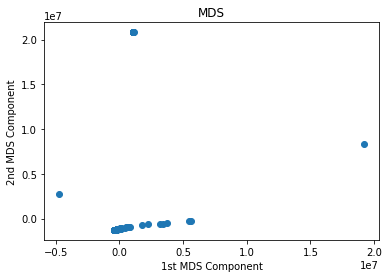

In [18]:
# Visualization of the countries' distances with MDS

model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
mds_result = model.fit_transform(distance_matrix_corrected)
x = mds_result[:,0]
y = mds_result[:,1]
plt.scatter(x,y)
plt.ylabel('2nd MDS Component')
plt.xlabel('1st MDS Component')
plt.title('MDS')
plt.show()

The best result was 0.970289 for 3 clusters.


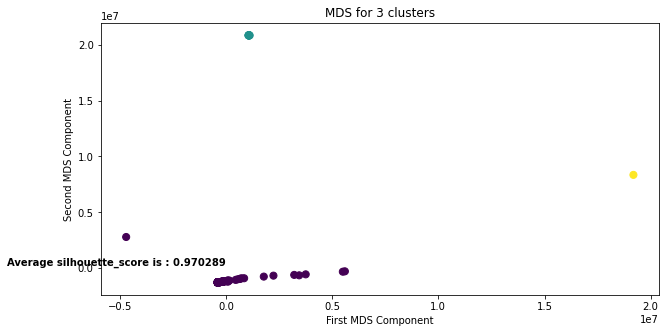

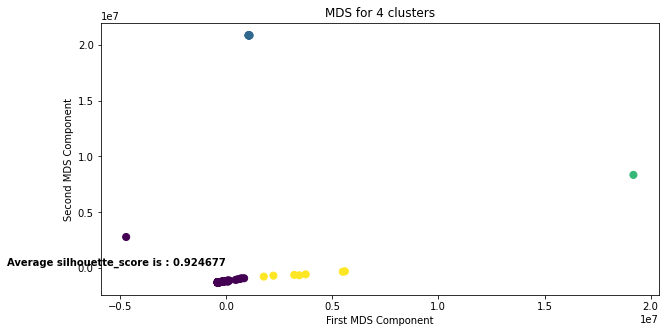

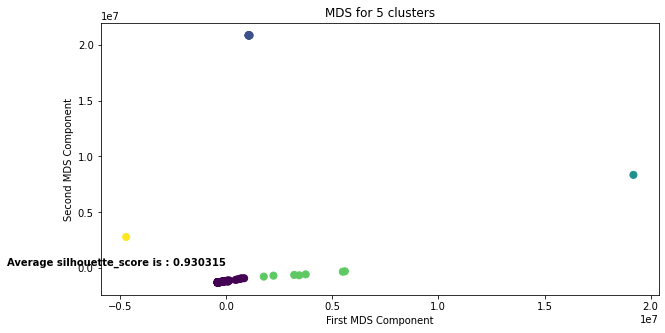

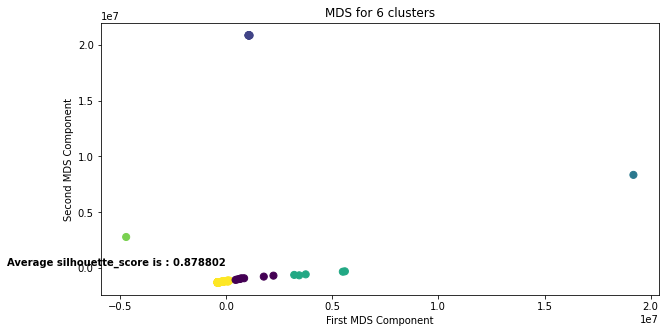

In [19]:
# K-Means clustering with Outliers and Silhouette score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

best = 0.0 
index = 0  
for cluster_number in range(3,7):
  kmeans = KMeans(n_clusters=cluster_number, random_state=0).fit(mds_result)
  kmeans.labels_
  y_kmeans = kmeans.predict(mds_result)
  silhouette_mean = silhouette_score(mds_result, kmeans.labels_)
  text = ("Average silhouette_score is : %lf" % silhouette_mean)

  plt.figure(figsize=(10,5))
  plt.text( 0, 0 , text, horizontalalignment='right',
           verticalalignment='bottom', weight='bold')
  plt.scatter(x, y, c=y_kmeans, s=50, cmap='viridis')
  plt.ylabel('Second MDS Component')
  plt.xlabel('First MDS Component')
  plt.title('MDS for %d clusters' % cluster_number)
  if(best < silhouette_mean):
    best = silhouette_mean
    index = cluster_number
    best_cluster_with_outliers = y_kmeans

print("The best result was %lf for %d clusters." % (best, index))

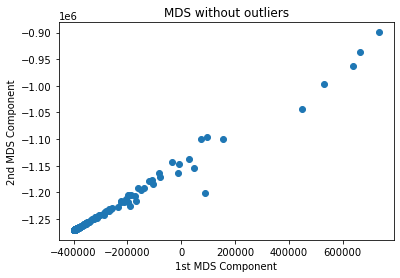

20 countries were removed.


In [20]:
from scipy import stats

# Procedure to find and eliminate outliers 
mds_without_outliers = mds_result[(np.abs(stats.zscore(mds_result)) < 0.5).all(axis=1)]
x1 = mds_without_outliers[:,0]
y1 = mds_without_outliers[:,1]
plt.scatter(x1,y1)
plt.ylabel('2nd MDS Component')
plt.xlabel('1st MDS Component')
plt.title('MDS without outliers')
plt.show()

print("%d countries were removed." % (mds_result.shape[0] - mds_without_outliers.shape[0]))

The best result without outlier was 0.797622 for 3 clusters.


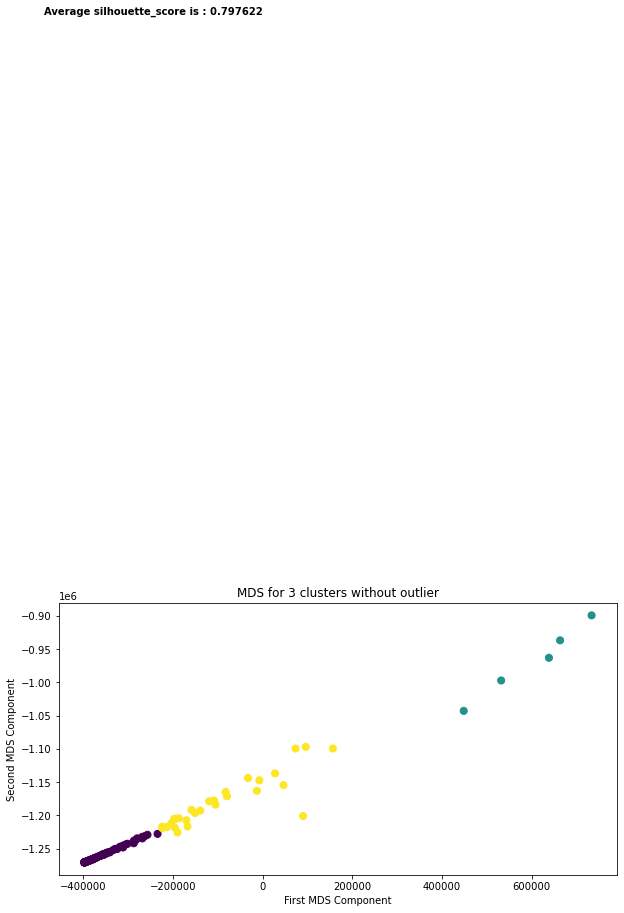

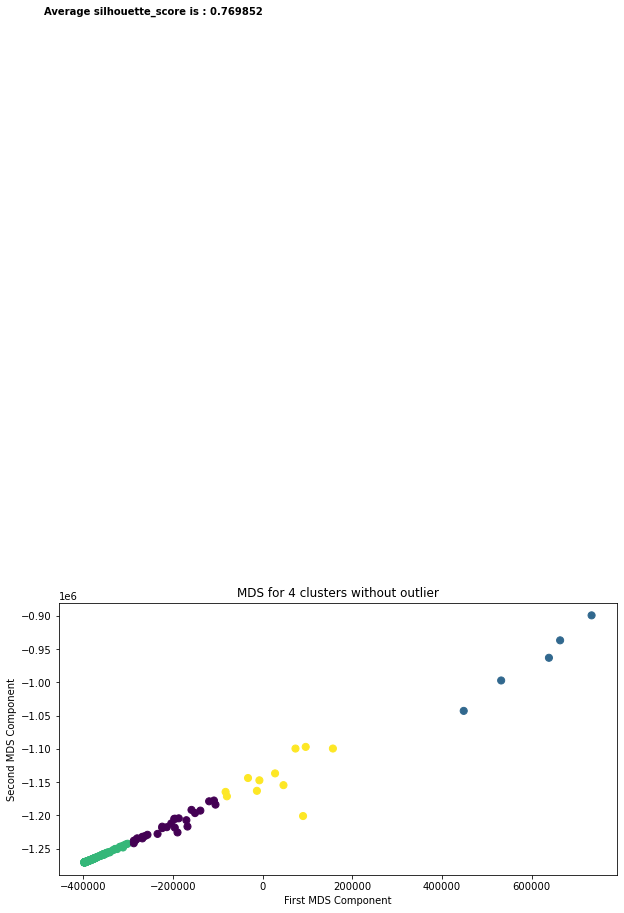

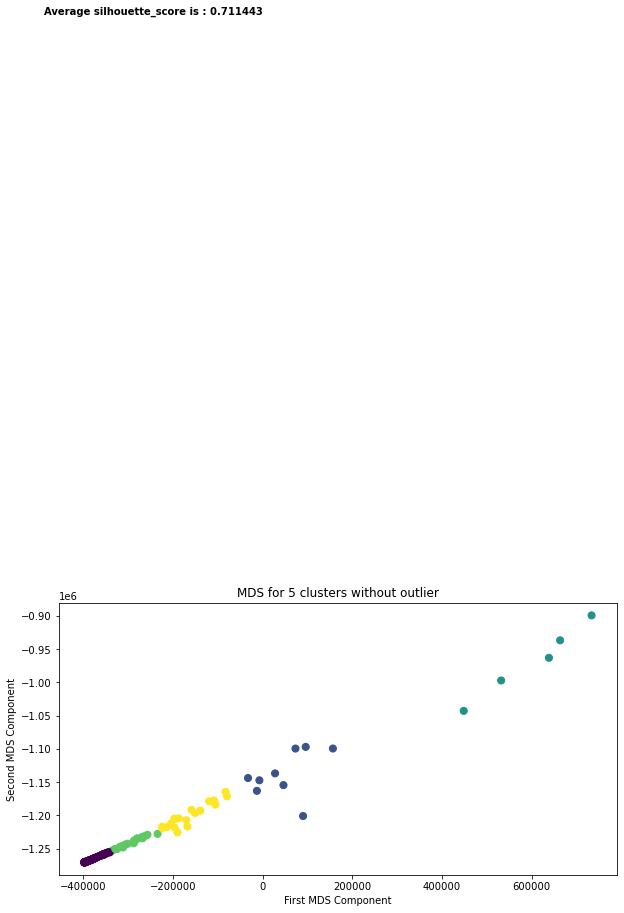

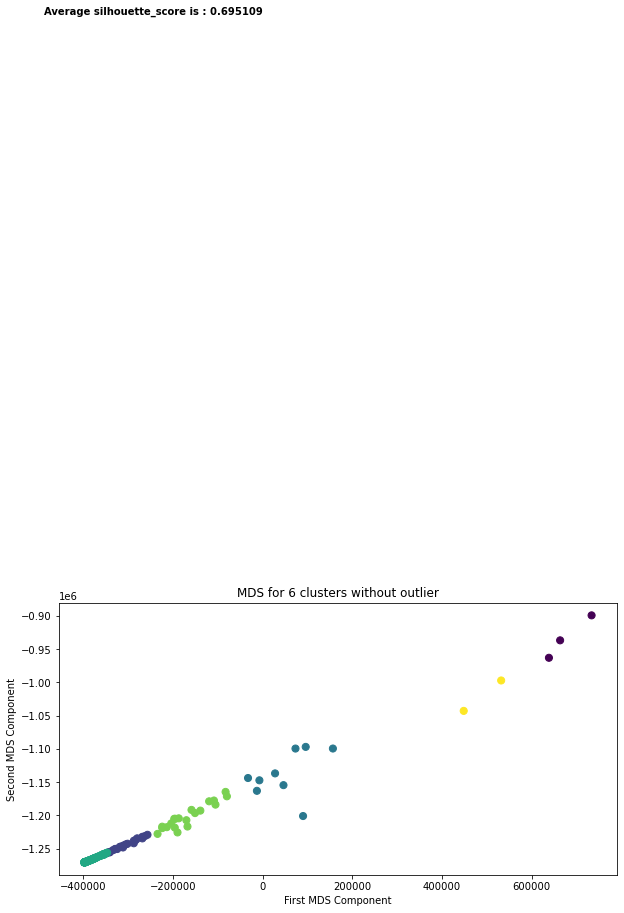

In [21]:
# K-Means clustering without Outliers and Silhouette score
best = 0.0 
index = 0  
for cluster_number in range(3,7):
  kmeans = KMeans(n_clusters=cluster_number, random_state=0).fit(mds_without_outliers)
  kmeans.labels_
  y_kmeans1 = kmeans.predict(mds_without_outliers)
  silhouette_mean = silhouette_score(mds_without_outliers, kmeans.labels_)
  text = ("Average silhouette_score is : %lf" % silhouette_mean)
  
  plt.figure(figsize=(10,5))
  plt.text( 0, 0 , text, horizontalalignment='right',
           verticalalignment='bottom', weight='bold')

  plt.scatter(x1, y1, c=y_kmeans1, s=50, cmap='viridis')
  plt.ylabel('Second MDS Component')
  plt.xlabel('First MDS Component')
  plt.title('MDS for %d clusters without outlier' % cluster_number)
  if(best < silhouette_mean):
    best = silhouette_mean
    index = cluster_number
    best_cluster_without_outliers = y_kmeans1
    
print("The best result without outlier was %lf for %d clusters." % (best, index))


In [22]:
# Add the countries' names in clusters according to the best model regarding silhouette evaluation.
# Best model accoring to silhouette evaluation was for 3 clusters without 
# outlier detection
cluster_A = []
cluster_B = []
cluster_C = []

for i in range(len(data)):
  value = ("%s" % (data[i][0]))
  if(best_cluster_with_outliers[i] == 0):
    cluster_A.append(value)
  elif(best_cluster_with_outliers[i] == 1): 
    cluster_B.append(value)
  else:
    cluster_C.append(value)

In [23]:
# Print cluster A
cluster_A

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Holy See

In [24]:
# Print cluster B
cluster_B 

['Kiribati',
 'Korea, North',
 'Lesotho',
 'Marshall Islands',
 'Micronesia',
 'Palau',
 'Samoa',
 'Solomon Islands',
 'Tonga',
 'Vanuatu']

In [25]:
# Print cluster C
cluster_C

['US']